
# Project: TMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## TMDB Data Set 
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),<br>
including user ratings and revenue.

# Questions to explore the dataset for.

### 1)What is the highest profit for each genrefrom 1960 to 2015?
### 2)What is the highest profit for each production company from 1960 to 2015?
### 3)What is the highest profit for each director movies from 1960 to 2015?
### 4)What is the relation between Runtime of a Movie and it's vote_average ?
### 5) what is the Relation between number of movies released and release year?
### 6)What is the highest count of voters in each year?

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
# quick look on data 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check how many rows and columns exist
df.shape

(10866, 21)

In [4]:
#identify which columns are important for the analysis and drop the rest
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#dropping non important columns
df.drop(
    ['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj', 'release_date'],
    axis=1, inplace=True
    )
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


## Create a profit column in our dataframe to be able to answer questions easier

In [6]:
#profit = revenue - budget
df['profit']=df['revenue']-df['budget']
df.profit.head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

### Cleaning and exploring the dataset

In [7]:
#check missing values from each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  profit                10866 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.1+ MB


## We find missing values in director, genres, and production companies
### we drop these rows as we filling them may make the dataset biased

In [8]:
#drop rows with null values from the dataframe
df.dropna(inplace=True)
#reset indices of values 
df.reset_index(inplace=True)
#check how many rows are left
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 9807 non-null   int64  
 1   id                    9807 non-null   int64  
 2   popularity            9807 non-null   float64
 3   budget                9807 non-null   int64  
 4   revenue               9807 non-null   int64  
 5   original_title        9807 non-null   object 
 6   director              9807 non-null   object 
 7   runtime               9807 non-null   int64  
 8   genres                9807 non-null   object 
 9   production_companies  9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  profit                9807 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
df.release_year.describe()

count    9807.000000
mean     2000.891200
std        13.032032
min      1960.000000
25%      1994.000000
50%      2005.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

we find that this data ranges from 1960 to 2015

<a id='eda'></a>
## Exploratory Data Analysis

### Before Analysing the data to find answers for questions, I noticed a couple of columns that have more than one value in each row so we need to create functions that help in seperating these values.

In [10]:
# We use this function to seperate multiple values in each row so we can analyse data properly
def separate_values(df, column_name, separator):
    """
    This function takes 3 parameters
    df: The Dataframe,
    column_name: name of column that will be seperated and exploded,
    separator: the character that seperates values in each row
    """
    required_df=df.assign(x=df[column_name].str.split(separator)).explode('x')
    required_df.drop([column_name],axis=1, inplace=True)
    required_df.rename(columns={'x':column_name}, inplace=True)
    return required_df

In [11]:
# we use this function to visualize data using seaborn (barplot)
def visualize_series(series_name,divisor,xlabel,ylabel,title):
    """
    This function takes 5 parameters
    series_name: the series that will be visualized
    divisor: the number that all the values in the series will be divided on 'Because we only use this function with numerical values'
    xlabel: string to label x-axis
    ylabel: string to label y-axis
    title: string to place as title 
    """
    sns.set(rc={'figure.figsize':(11,8)})
    sns.barplot(x=series_name.index,y=series_name/divisor)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

### 1)What is the highest profit for each genre in all years?

### We start by separating each genre of movie to be able to do calculations properly

In [12]:
genres_df=separate_values(df, 'genres', '|')
genres_df.head(10)

,index,id,popularity,budget,revenue,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,profit,genres
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,Action
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,Adventure
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,Science Fiction
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,Thriller
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354,Action
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354,Adventure
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354,Science Fiction
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354,Thriller
2,2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,185238201,Adventure
2,2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,185238201,Science Fiction


### Then get the total profit of movies in each genre

In [13]:
total_profit_genres=genres_df.groupby('genres')['profit'].sum().sort_values(ascending=False)
total_profit_genres

genres
Adventure          111216306097
Action             107540425634
Comedy              91947521248
Drama               82656036667
Thriller            71402548810
Family              60428716422
Fantasy             58370575641
Science Fiction     55498225885
Romance             39663524435
Animation           36404581745
Crime               33500913873
Mystery             19507720245
Horror              17374298706
Music                7825491647
War                  7252990243
History              4538119745
Western              1583109216
Documentary           720945243
TV Movie               -2700000
Foreign               -60836958
Name: profit, dtype: int64

### We find that TV Movie, and Foreign are losing profit so we drop them from the dataframe genres

In [14]:
#Focusing only on positive profit 
total_profit_genres=total_profit_genres[total_profit_genres>0]
total_profit_genres

genres
Adventure          111216306097
Action             107540425634
Comedy              91947521248
Drama               82656036667
Thriller            71402548810
Family              60428716422
Fantasy             58370575641
Science Fiction     55498225885
Romance             39663524435
Animation           36404581745
Crime               33500913873
Mystery             19507720245
Horror              17374298706
Music                7825491647
War                  7252990243
History              4538119745
Western              1583109216
Documentary           720945243
Name: profit, dtype: int64

## looks good to visualize now

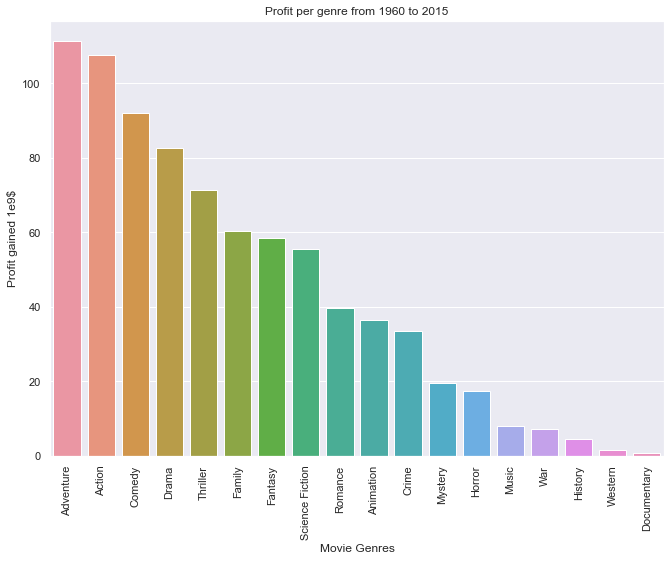

In [15]:
#calling the barplot function we created earlier with values needed to visualize the dataframe
visualize_series(
    total_profit_genres, 1e9, "Movie Genres",
    "Profit gained 1e9$","Profit per genre from 1960 to 2015"
    )

### We find that Adventure movies are the highest movies with profit,<br> and Documentries are the least movies with profit<br>


### 2)What is the highest profit for each production company in all years?

### We do like we did with genres because we can see that a movie can have more than one production company

In [16]:
PCs_df=separate_values(df, 'production_companies', '|')
PCs_df.head(10)

,index,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,profit,production_companies
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,Universal Studios
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,Amblin Entertainment
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,Legendary Pictures
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,Fuji Television Network
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810,Dentsu
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354,Village Roadshow Pictures
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354,Kennedy Miller Productions
2,2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201,Summit Entertainment
2,2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201,Mandeville Films
2,2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201,Red Wagon Entertainment


In [17]:
total_profit_PCs=PCs_df.groupby('production_companies')['profit'].sum().sort_values(ascending=False)
total_profit_PCs

production_companies
Warner Bros.                              34703823331
Universal Pictures                        32575422791
Paramount Pictures                        27538581413
Twentieth Century Fox Film Corporation    27402754987
Walt Disney Pictures                      22008457637
                                             ...     
Silver Bullet Productions (II)             -165710090
France 2 CinÃ©ma                           -193953476
Wild Bunch                                 -245161142
Franchise Pictures                         -359214359
Boram Entertainment Inc.                   -413912431
Name: profit, Length: 7863, dtype: int64

### We find 0s and negative values , this means this companies lost money or the movies just covered their budget 

In [18]:
#Focusing only on positive profit 
total_profit_PCs=total_profit_PCs[total_profit_PCs>0]
total_profit_PCs

production_companies
Warner Bros.                              34703823331
Universal Pictures                        32575422791
Paramount Pictures                        27538581413
Twentieth Century Fox Film Corporation    27402754987
Walt Disney Pictures                      22008457637
                                             ...     
Darkside Movie                                     13
Farrell Paura Productions                           5
Gospel Truth Pictures                               5
Filmhuset Gruppen                                   1
Leiknar Myndir                                      1
Name: profit, Length: 2925, dtype: int64

### we find that the number of production companies is quite big (2925 companies that gained profit) so we only visualize the top 20 of them

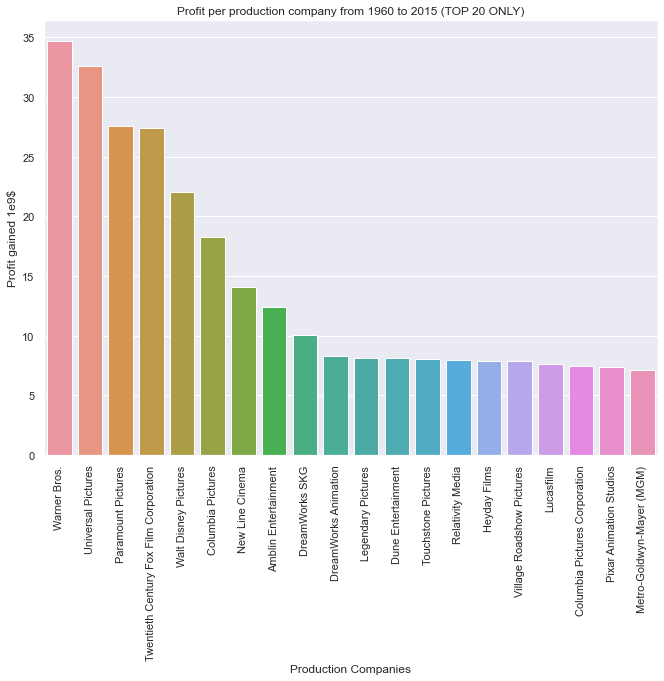

In [19]:
#calling the barplot function we created earlier with values needed to visualize the dataframe
visualize_series(
    total_profit_PCs[:20], 1e9, "Production Companies",
    "Profit gained 1e9$","Profit per production company from 1960 to 2015 (TOP 20 ONLY)"
    )

### 3)What is the highest profit for each movie Director in all years?

In [20]:
directors_df=separate_values(df, 'director', '|')
directors_df.head(10)

,index,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,director
0,0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,Colin Trevorrow
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354,George Miller
2,2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,185238201,Robert Schwentke
3,3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1868178225,J.J. Abrams
4,4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1316249360,James Wan
5,5,281957,9.110700,135000000,532950503,The Revenant,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,397950503,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6,6,87101,8.654359,155000000,440603537,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015,285603537,Alan Taylor
7,7,286217,7.667400,108000000,595380321,The Martian,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,487380321,Ridley Scott
8,8,211672,7.404165,74000000,1156730962,Minions,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,1082730962,Kyle Balda
8,8,211672,7.404165,74000000,1156730962,Minions,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,1082730962,Pierre Coffin


In [21]:
total_profit_DCs=directors_df.groupby('director')['profit'].sum().sort_values(ascending=False)
total_profit_DCs

director
Steven Spielberg    7448064691
Peter Jackson       5196468949
James Cameron       5081849077
Michael Bay         3557208171
David Yates         3379295625
                       ...    
Graham Yost         -120000000
Jeremy Podeswa      -120000000
Tim Van Patten      -120000000
Uwe Boll            -153333591
Sngmoo Lee          -413912431
Name: profit, Length: 4776, dtype: int64

### We find 0s and negative values, so we clear them off.

In [22]:
#Focusing only on positive profit 
total_profit_DCs=total_profit_DCs[total_profit_DCs>0]
total_profit_DCs

director
Steven Spielberg       7448064691
Peter Jackson          5196468949
James Cameron          5081849077
Michael Bay            3557208171
David Yates            3379295625
                          ...    
Joseph Barbera                 20
Gene Quintano                  19
Ate de Jong                    13
Gregory Widen                   8
Benedikt Erlingsson             1
Name: profit, Length: 1732, dtype: int64

### we find that the number of directors is quite big (1732 directors that gained profit) so we only visualize the top 20 of them

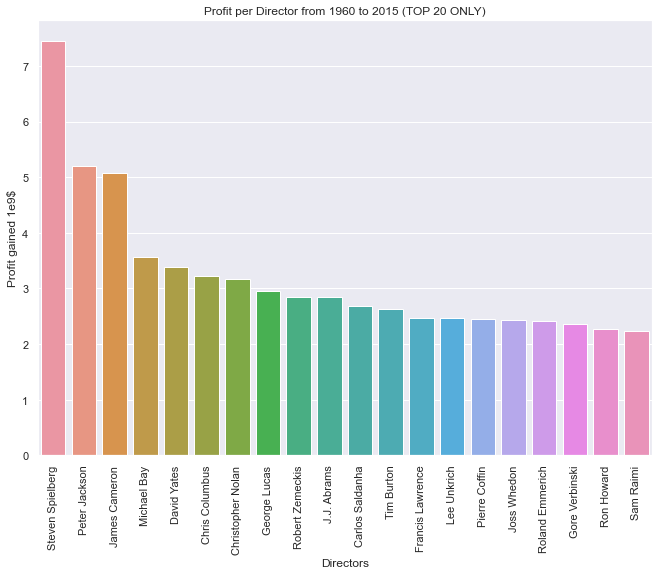

In [23]:
#calling the barplot function we created earlier with values needed to visualize the dataframe
visualize_series(
    total_profit_DCs[:20], 1e9, "Directors",
    "Profit gained 1e9$","Profit per Director from 1960 to 2015 (TOP 20 ONLY)"
    )

### 4)What is the relation between Runtime of a Movie and it's vote average?

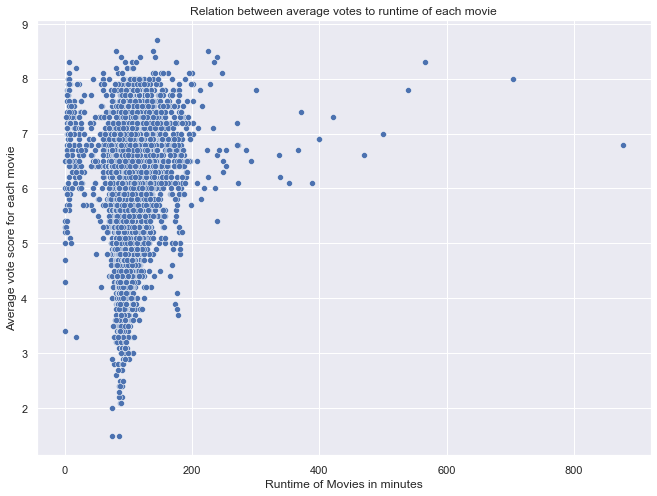

In [24]:
# create a scatter plot with runtime of movie on x-axis and its vote average on y-axis
sns.scatterplot(data=df,x='runtime',y='vote_average')
plt.xlabel("Runtime of Movies in minutes")
plt.ylabel("Average vote score for each movie")
plt.title("Relation between average votes to runtime of each movie")
plt.show()

We can see that movies that exceed 200 have an average vote above 5 while we cant see a specific pattern for movies under 200 mins, nevertheless they are very small in terms to the rest of the data and we cant really be sure that longer movies have a better vote average.

### 5) what is the Relation between number of movies released and release year?

In [25]:
# check a sample of movies released for each year
df.groupby('release_year')['index'].count().head(10)

release_year
1960    32
1961    30
1962    30
1963    34
1964    41
1965    34
1966    44
1967    37
1968    37
1969    29
Name: index, dtype: int64

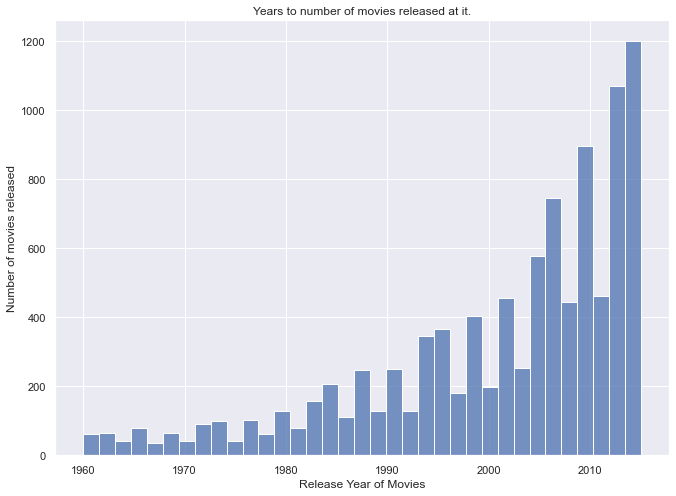

In [26]:
# create a histogram with release years on x-axis and number of movies released on y-axis
sns.histplot(data=df,x='release_year');
plt.ylabel("Number of movies released")
plt.xlabel("Release Year of Movies")
plt.title("Years to number of movies released at it.")
plt.show()

we can see that as we go further in time more movies are released each year

### 6)What is the highest count of voters in each year?

In [27]:
# check a sample of vote counts for each year
df.groupby('release_year')['vote_count'].sum().head(10)

release_year
1960    2481
1961    2395
1962    2364
1963    2816
1964    3126
1965    1810
1966    1422
1967    3062
1968    4194
1969    1702
Name: vote_count, dtype: int64

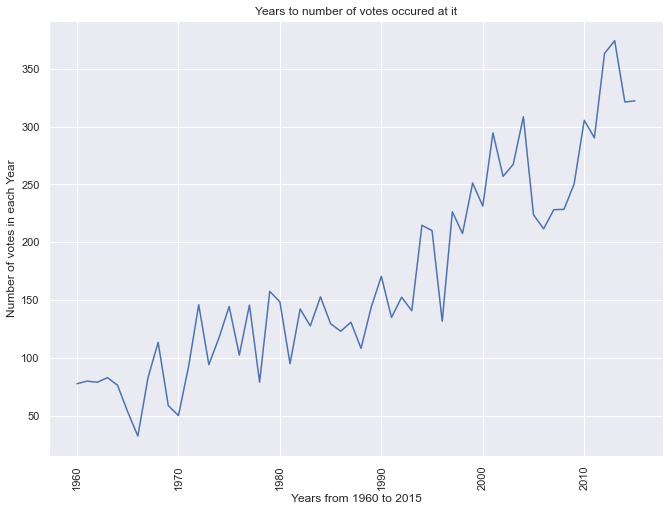

In [28]:
# create a line plot with years on x-axis and number of votes on y-axis
sns.lineplot(data=df,x='release_year',y='vote_count',ci=None)
plt.xticks(rotation=90)
plt.xlabel("Years from 1960 to 2015")
plt.ylabel("Number of votes in each Year")
plt.title('Years to number of votes occured at it')
plt.show()

We can see that the number of voters over time has been increasing

<a id='conclusions'></a>
## Conclusions and Limitations

## Conclusions:
### First:
We can see from the data that the highest movie genre that made profit was Adventure movies
### Second:
We can see the highest profit production companies and at first place is Warner Bros 
### Third:
We found that Steven Speilberg movies where the highest profit movies from 1960 to 2015
### Fourth:
We found in this data-set that most of the movies runtime range between 0 to 200 minutes, and all of the movies higher than 200 mins of runtime got vote average more than 5.
### Fifth:
we find that by time the number of movies released is increased each year, at 1960 there was 32 movies released
while at 2015 there was 561 movies released.
### Sixth:
Voting on movies has incresed over the years from 1960 with 2481 votes to 2015 with 180784 votes.
## Limitations:
### First:
The Dataset had many missing values that its size went from 10866 to 9807 by deleting them
### Second:
There were not enough movies with more than 200 minutes of runtime to make sure that longer movies have better vote average 
### Third:
we can dive more in this dataset by analysing more aspects and relationships between these columns
[ popularity, budget, vote_count, vote_average],
and also the keywords related to each genre